In [1]:
import sklearn.naive_bayes as nb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [2]:
adult_dat = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*', engine='python', na_values="?")



In [3]:
adult_dat['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [4]:
adult_dat['Target'].value_counts()

<=50K    24720
>50K      7841
Name: Target, dtype: int64

In [5]:
adult_dat['Target'] = adult_dat['Target'].apply(lambda x: 1 if x == '>50K' else 0)

In [6]:
adult_dat.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

In [7]:
adult_dat.dropna(inplace=True)

In [8]:
adult_dat.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [9]:
le = LabelEncoder()

In [10]:
le.fit_transform(adult_dat['Workclass'])

array([5, 4, 2, ..., 2, 2, 3])

In [11]:
adult_dat['Workclass'] = le.fit_transform(adult_dat['Workclass'])

In [12]:
adult_dat['Education'] = le.fit_transform(adult_dat['Education'])

In [13]:
adult_dat['Martial Status'] = le.fit_transform(adult_dat['Martial Status'])
adult_dat['Occupation'] = le.fit_transform(adult_dat['Occupation'])
adult_dat['Relationship'] = le.fit_transform(adult_dat['Relationship'])
adult_dat['Race'] = le.fit_transform(adult_dat['Race'])
adult_dat['Sex'] = le.fit_transform(adult_dat['Sex'])
adult_dat['Country'] = le.fit_transform(adult_dat['Country'])

In [14]:
adult_dat['Martial Status'].value_counts()

2    14065
4     9726
0     4214
5      939
6      827
3      370
1       21
Name: Martial Status, dtype: int64

In [42]:
x = adult_dat.drop(['Target'], axis=1)

In [31]:
y = adult_dat['Target']

In [36]:
x.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [19]:
ss = StandardScaler()

In [43]:
x = ss.fit_transform(x[['Age', 'Education']])

In [21]:
y = ss.fit_transform(y)

/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is 

In [23]:
type(x)

numpy.ndarray

In [24]:
type(y)

numpy.ndarray

In [38]:
x[:5]

array([[ 0.04279571,  2.93600035, -1.0627216 , -0.34986472],
       [ 0.88028814,  1.88768202, -1.00787131, -0.34986472],
       [-0.03333996, -0.20895464,  0.24469349,  0.17476277],
       [ 1.10869517, -0.20895464,  0.42524039, -2.4483747 ],
       [-0.79469672, -0.20895464,  1.4066583 , -0.34986472]])

In [29]:
y[:5]

array([-0.57569132, -0.57569132, -0.57569132, -0.57569132, -0.57569132])

In [25]:
x.shape

(30162, 14)

In [26]:
y.shape

(30162,)

In [ ]:
y[:5]

In [30]:
y[0:5]

array([-0.57569132, -0.57569132, -0.57569132, -0.57569132, -0.57569132])

In [51]:
lda = LinearDiscriminantAnalysis().fit_transform(x,y)

In [52]:
lda

array([[-0.07053039],
       [ 0.75276843],
       [ 0.0234709 ],
       ..., 
       [ 1.52037786],
       [-1.17405467],
       [ 1.07130577]])

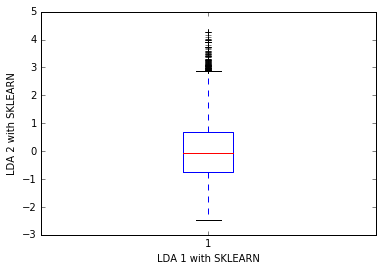

In [54]:
plt.boxplot(lda)
plt.xlabel('LDA 1 with SKLEARN')
plt.ylabel('LDA 2 with SKLEARN')